## О задании

Задание состоит из двух разделов:
1. В первом разделе - применение деревьев из **sklearn** для задачи классификации, построение разделяющих поверхностей для различных датасетов, анализ их зависимости от гиперпараметров.
2. Во втором разделе - реализация собственных решающих деревьев, сравнение со стандартной имплиментацией из **sklearn**; тестирование деревьев и сравнение различных подходов к кодированию категориальных признаков.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style='whitegrid')

import warnings

warnings.filterwarnings('ignore')

% matplotlib inline

UsageError: Line magic function `%` not found.


# 1. Решающие деревья. Визуализация.

Рассмотрим два простых двумерных датасета, сформированных с помощью `make_moons`, `make_circles` и изучим, как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [17]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )]

In [18]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

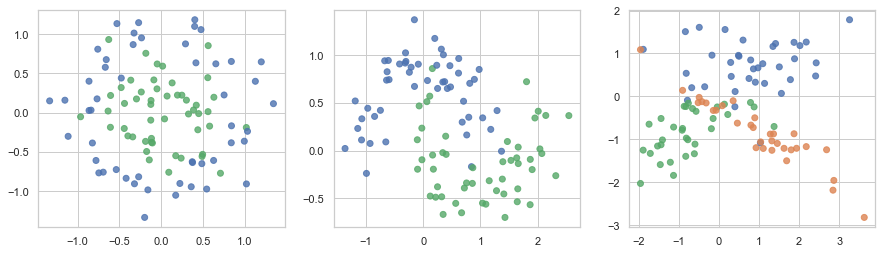

In [19]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

### Задание 1

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Вычислите значение **accuracy** на обучающей и тестовой выборках. Оцените степень переобученности деревьев.

Точность на обучающем наборе: 1.000
Точность на тестовом наборе: 0.733
Переобученность: 0.267

Точность на обучающем наборе: 1.000
Точность на тестовом наборе: 0.867
Переобученность: 0.133

Точность на обучающем наборе: 1.000
Точность на тестовом наборе: 0.833
Переобученность: 0.167



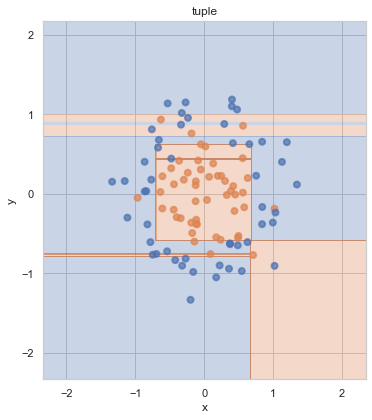

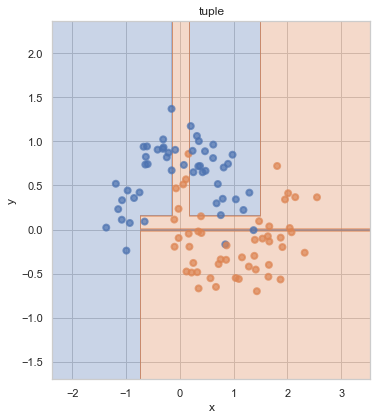

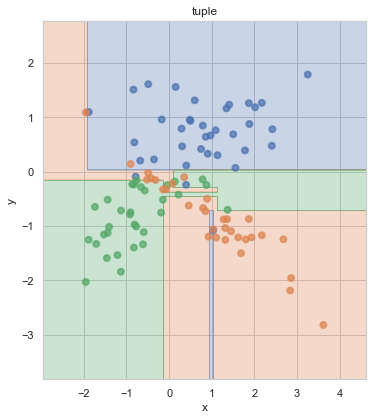

In [20]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y], linewidths=2)

# Train a decision tree with default parameters, after dividing the sample into training and test sets
for i, dataset in enumerate(datasets):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    print('Точность на обучающем наборе: {:.3f}'.format(tree.score(X_train, y_train)))
    print('Точность на тестовом наборе: {:.3f}'.format(tree.score(X_test, y_test)))
    print('Переобученность: {:.3f}'.format(1 - tree.score(X_test, y_test) / tree.score(X_train, y_train)))
    print()
    # Визуализация разделяющей поверхности
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 2)
    plot_surface(tree, X, y)
    plt.title(dataset.__class__.__name__)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()

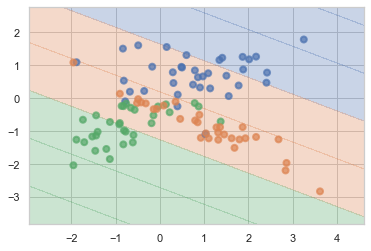

In [21]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

### Решение

### Задание 2

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делать каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (напоминание: итоговое дерево сильно зависит от небольшого изменения обучающей выборки). Проследите, как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

### Решение

Точность на обучающем наборе: 0.729
Точность на тестовом наборе: 0.467
Переобученность: 0.359

Точность на обучающем наборе: 0.729
Точность на тестовом наборе: 0.467
Переобученность: 0.359

Точность на обучающем наборе: 0.829
Точность на тестовом наборе: 0.633
Переобученность: 0.236

Точность на обучающем наборе: 0.814
Точность на тестовом наборе: 0.667
Переобученность: 0.181

Точность на обучающем наборе: 0.843
Точность на тестовом наборе: 0.800
Переобученность: 0.051

Точность на обучающем наборе: 0.843
Точность на тестовом наборе: 0.800
Переобученность: 0.051

Точность на обучающем наборе: 0.914
Точность на тестовом наборе: 0.933
Переобученность: -0.021

Точность на обучающем наборе: 0.900
Точность на тестовом наборе: 0.833
Переобученность: 0.074

Точность на обучающем наборе: 0.671
Точность на тестовом наборе: 0.600
Переобученность: 0.106

Точность на обучающем наборе: 0.671
Точность на тестовом наборе: 0.600
Переобученность: 0.106

Точность на обучающем наборе: 0.900
Точность на т

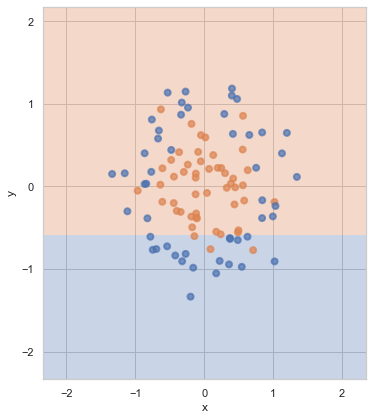

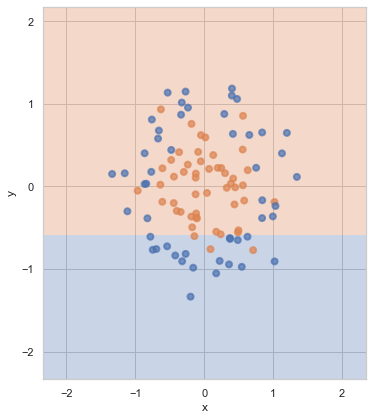

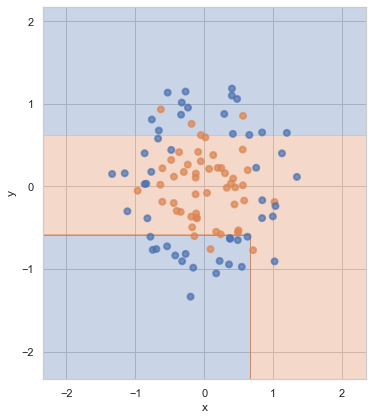

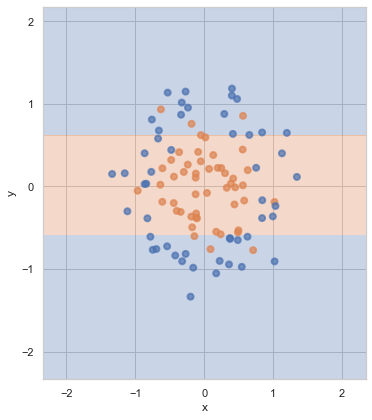

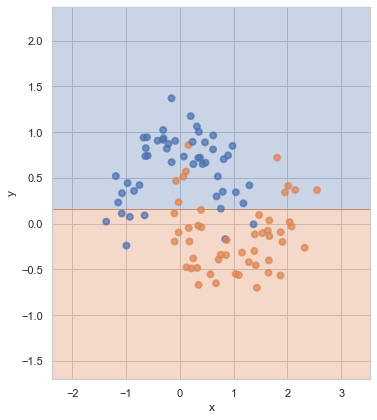

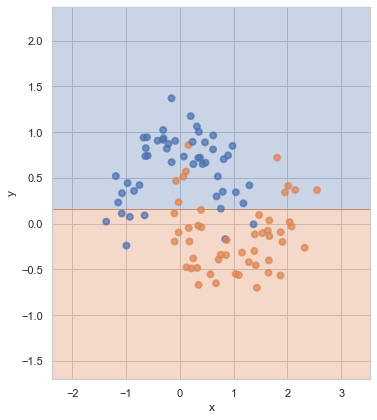

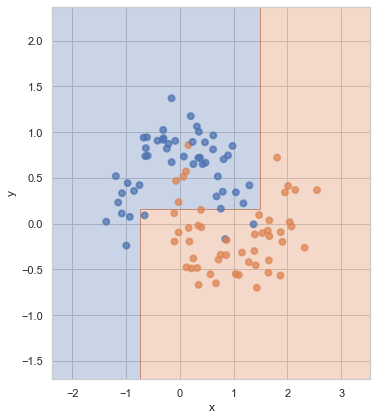

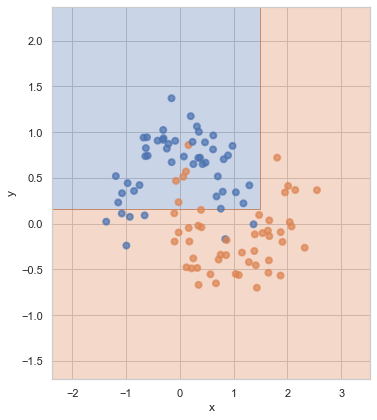

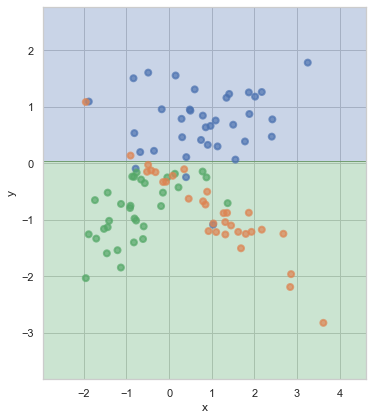

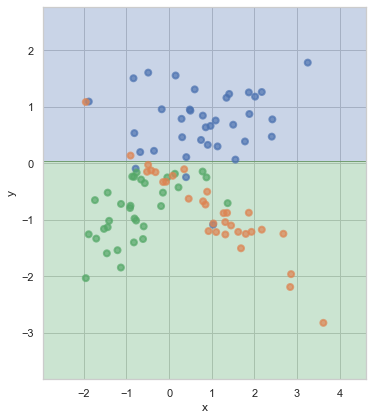

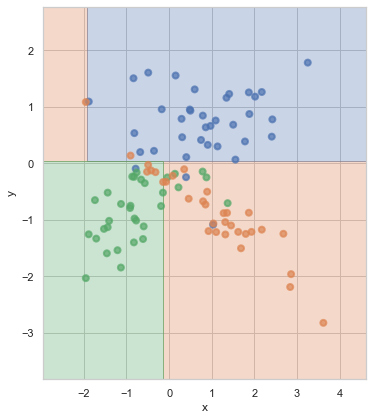

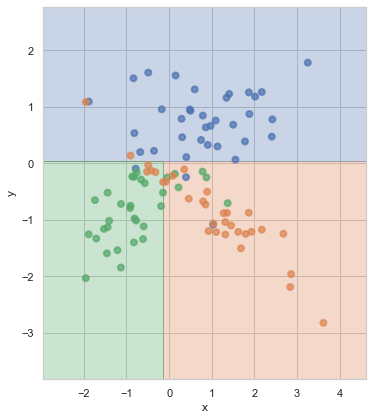

In [22]:
# Iterate over several parameters for regularization (eg. max_depth, min_samples_leaf)
for i, dataset in enumerate(datasets):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for max_depth in range(1, 3):
        for min_samples_leaf in range(1, 3):
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            tree.fit(X_train, y_train)
            print('Точность на обучающем наборе: {:.3f}'.format(tree.score(X_train, y_train)))
            print('Точность на тестовом наборе: {:.3f}'.format(tree.score(X_test, y_test)))
            print('Переобученность: {:.3f}'.format(1 - tree.score(X_test, y_test) / tree.score(X_train, y_train)))
            print()
            # Визуализация разделяющей поверхности
            plt.figure(figsize=(10, 6))
            plt.subplot(1, 2, 2)
            plot_surface(tree, X, y)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.tight_layout()

# 2. Решающие деревья своими руками

В этой части нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

### Задание 3

Реализуйте функцию find_best_split для получения оптимального разбиения по заданному признаку

### Решение

In [23]:
# Create a find_best_split function to get the best split of X and y for a given feature
def find_best_split(X, y, feature):
    """
    Find the best split of X and y for a given feature.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix.
    y : array-like, shape (n_samples,)
        Target vector.
    feature : int
        Feature index.
    Returns
    -------
    best_threshold : float
        Best threshold value.
    best_score : float
        Best score value.
    """
    # Выберите оптимальный порог и оценку для данного признака
    best_threshold = None
    best_score = 0
    X_train, X_test, y_train, y_test = 0, 0, 0, 0
    for threshold in np.unique(X[:, feature]):
        X_train, X_test, y_train, y_test, score = score_split(X, y, feature, threshold)
        if score > best_score:
            best_threshold = threshold
            best_score = score
    return X_train, X_test, y_train, y_test, best_threshold, best_score


# Create score_split function to calculate the score of a split
def score_split(X, y, feature, threshold):
    """
    Calculate the score of a split.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix.
    y : array-like, shape (n_samples,)
        Target vector.
    feature : int
        Feature index.
    threshold : float
        Threshold value.
    Returns
    -------
    score : float
        Score value.
    """
    X_left = X[X[:, feature] <= threshold]
    X_right = X[X[:, feature] > threshold]
    y_left = y[X[:, feature] <= threshold]
    y_right = y[X[:, feature] > threshold]
    n_left = X_left.shape[0]
    n_right = X_right.shape[0]
    n_total = n_left + n_right
    p_left = np.sum(y_left) / n_left
    p_right = np.sum(y_right) / n_right
    p_total = np.sum(y) / n_total
    score = np.abs(p_total - (p_left * n_left + p_right * n_right) / n_total) / n_total
    return X_right, X_left, y_right, y_left, score


find_best_split(X, y, 0)

(array([], shape=(0, 2), dtype=float64),
 array([[ 2.01886651,  1.18263506],
        [ 1.87169996, -0.87356824],
        [-1.73977262, -0.65055602],
        [ 1.88436759,  0.87500638],
        [ 0.74998372,  0.41538543],
        [-0.1878893 , -0.75580336],
        [ 1.78118534,  0.38871202],
        [ 1.45508134, -1.09954273],
        [ 2.40996691,  0.47390406],
        [-0.49137472, -0.0257671 ],
        [-0.78418733, -0.09293569],
        [-0.35399877,  0.22254322],
        [-0.42167729, -0.12467969],
        [ 2.68285048, -1.24657734],
        [ 1.37459743, -0.70427191],
        [-0.51704075, -0.14842358],
        [ 1.28023527, -0.88130433],
        [ 1.31863252, -1.03980866],
        [-0.9044121 ,  0.13867038],
        [ 0.86060558,  0.63918244],
        [ 2.84237626, -2.18948447],
        [-1.40671473, -1.01737505],
        [-0.0410213 , -0.24815041],
        [ 1.68783328, -1.50376068],
        [-0.0713458 , -0.32542956],
        [-1.88428971,  1.09496961],
        [-0.5699091 , -

### Задание 4
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

### Решение

### Задание 5

Исходя из кривых значений критерия Джини, сделайте вывод: по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как можно охарактеризовать вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

### Решение

### Задание 6 (дополнительно)

Выполните собственную реализацию класса DecisionTree для работы с решающими деревьями.

Выбор лучшего разбиения необходимо производить по критерию Джини. 

Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. 

Ответ в листе: наиболее часто встречающийся класс в листе. 

### Решение

### Задание 7 (для тех, кто выполнил задание 6)

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous). Оценка качества будет выполняться с помощью **accuracy**, поэтому не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите значение **accuracy**.

Должно получиться значение **accuracy**, равное единице (или очень близкое к единице), и не очень глубокое дерево.

### Решение

### Задание 8 (для тех, кто выполнил задания 6 и 7)
Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце).

### Решение